# Linear Sweep Search

In this file I develop an algorithm to search the carpal tunnel along one axis 

In [1]:
# import
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

from nibabel.testing import data_path
from scipy.ndimage import label

from visualization_utils import show, show_slices



Visualizatioin functions

Load the dataset

In [2]:
mri_1_label = nib.load('MRI/Labels/final/LabelsDani.nii')
mri_1_label_data = mri_1_label.get_fdata()
mri_1_label_data.shape

(606, 864, 61)

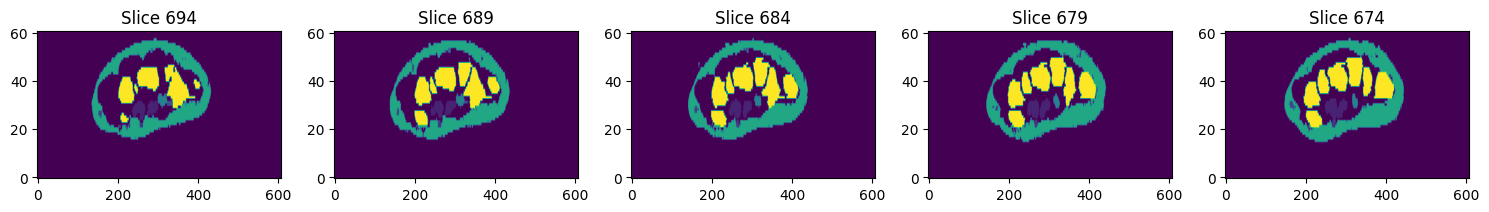

In [3]:
show_slices(mri_1_label_data,  mri_1_label_data.shape[1]-170, 5, 5)

In [4]:
np.savetxt("carpal_values.txt", mri_1_label_data[:, 679, :], fmt='%.3f')

In [5]:
tissues = { "bone": 20,
            "ligaments": 2,
            "ulnar a/n": 3,}


In [6]:
def find_clusters(slice: np.ndarray, tissue_value: int) -> list:
    # Create a binary mask based on the threshold
    binary_mask = (slice == tissue_value)

    # Label connected components in the binary mask
    labeled_array, num_clusters = label(binary_mask)

    # Extract clusters and their centers
    cluster_data = []
    
    for cluster_label in range(num_clusters):
        cluster_indices = np.where(labeled_array == cluster_label+1)
        # Calculate the center of the cluster
        center_x = np.mean(cluster_indices[0])
        center_y = np.mean(cluster_indices[1])
        center = (center_x, center_y)

        # Save both the cluster and center under the same key
        cluster_data.append({'cluster': list(zip(cluster_indices[0], cluster_indices[1])),
                                       'center': center})

    return cluster_data

In [7]:
def cluster_iter(slice: np.ndarray, tissues: dict) -> list[dict]:
    # store clsuters of tissues in a dict
    tissues_clusters = {}
    
    for tissue in tissues:
        print(f"Finding {tissue} clusters, with value {tissues[tissue]}:")
        tissues_clusters[tissue] = (find_clusters(slice, tissues[tissue]))

        # Print the identified clusters and their centers
        for index, data in enumerate(tissues_clusters[tissue]):
            print(f"Center of {tissue} cluster {index}: {data['center']}")
            
    return tissues_clusters

Finding bone clusters, with value 20:
Center of bone cluster 0: (216.32584269662922, 34.07303370786517)
Center of bone cluster 1: (219.5589519650655, 24.148471615720524)
Center of bone cluster 2: (243.7093023255814, 38.54651162790697)
Center of bone cluster 3: (280.0227790432802, 41.264236902050115)
Center of bone cluster 4: (321.69170984455957, 43.89637305699482)
Center of bone cluster 5: (350.951367781155, 37.82674772036474)
Center of bone cluster 6: (394.2334217506631, 37.54641909814324)
Finding ligaments clusters, with value 2:
Center of ligaments cluster 0: (261.43956043956047, 28.208791208791208)
Center of ligaments cluster 1: (288.9507042253521, 28.485915492957748)
Finding ulnar a/n clusters, with value 3:
Center of ulnar a/n cluster 0: (267.5833333333333, 22.25)


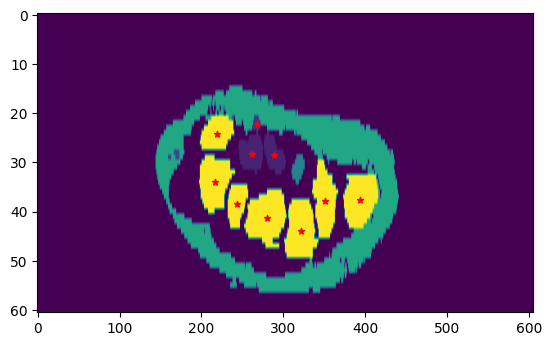

In [8]:
tissue_clusters = cluster_iter(mri_1_label_data[:, 679, :], tissues)

for tissue in tissues:
    for index, data in enumerate(tissue_clusters[tissue]):
        plt.scatter(*data['center'], color='red', marker='*', s=20)

plt.imshow(mri_1_label_data[:, 679, :].T, aspect=6)

plt.show()